# Task 1

In [1]:
#include <iostream>
#include <unordered_map> 
#include <vector>
#include <utility>
#include <algorithm>  
#include <random>

### Defining the types for preference tables and matchings

In [2]:
typedef std::unordered_map<std::string,std::vector<std::string>> pref_table;
typedef std::unordered_map<std::string,std::string> match;

### N is the number of males/females

In [3]:
int N {4};

### Generate the males and female vectors

In [4]:
std::vector<std::string> males;
std::vector<std::string> females;
std::string s;
for (int i = 0; i < N; i++)
{
    s = std::to_string(i);
    males.push_back("M"+s);
    females.push_back("F"+s);
}

### Generate random preference tables

In [5]:
// create female preference table
pref_table female_pref1;
for (const auto& it : females)
{
    std::random_shuffle (males.begin(),males.end());
    female_pref1[it]=males;
}
// create male preference table
pref_table male_pref1;
for (const auto& it : males)
{
    std::random_shuffle (females.begin(),females.end());
    male_pref1[it]=females;
}

### Check the preference tables look sensible

In [6]:
male_pref1;

(pref_table &) { "M2" => { "F1", "F0", "F2", "F3" }, "M1" => { "F2", "F1", "F3", "F0" }, "M3" => { "F1", "F2", "F3", "F0" }, "M0" => { "F2", "F1", "F3", "F0" } }


In [7]:
female_pref1;

(pref_table &) { "F3" => { "M0", "M3", "M2", "M1" }, "F2" => { "M3", "M1", "M2", "M0" }, "F1" => { "M1", "M2", "M0", "M3" }, "F0" => { "M1", "M2", "M3", "M0" } }


### Below is the fundamental algorithm

In [8]:
match fund(pref_table male_pref,pref_table female_pref)
{
    match matching;
    std::string x;
    std::string X;
    std::string x_fiance;
    int ind_new;
    int ind_old;
    
    // first add the imaginary undesirable man 
    for (const auto& it : female_pref)
    {
        female_pref.at(it.first).push_back("O");
    }
    // engage all women to imaginary man
    for (const auto& it : females)
    {
        matching[it]="O";
    }
    // main loop
    for (const auto& it : males)
    {
        X = it;
        while (X!="O")
        {
            x = male_pref[X][0];
            x_fiance = matching[x];
            
            // find indices of current and potential spouse
            auto i = std::find(female_pref[x].begin(), female_pref[x].end(), x_fiance);
            ind_old = std::distance(female_pref[x].begin(), i);
            i = std::find(female_pref[x].begin(), female_pref[x].end(), X);
            ind_new = std::distance(female_pref[x].begin(), i);
 
            // pair female with current male if they prefer
            if (ind_new < ind_old)
            {
                matching[x]=X;
                X = x_fiance;
            }
            
            // if the man isn't imaginary, remove current best choice from his list
            if (X != "O")
            {
                male_pref[X].erase (male_pref[X].begin());
            }
        }
    }
    return matching;
}

In [9]:
fund(male_pref1,female_pref1) // correct according to python code

(match) { "F0" => "M2", "F3" => "M0", "F1" => "M1", "F2" => "M3" }


### Testing using example from notes

In [10]:
pref_table male_pref_example;
pref_table female_pref_example

In [11]:
male_pref_example["M0"] = {"F2","F1","F3","F0"};
male_pref_example["M1"] = {"F1","F0","F2","F3"};
male_pref_example["M2"] = {"F1","F3","F0","F2"};
male_pref_example["M3"] = {"F2","F0","F3","F1"};

(std::vector &) { "F2", "F0", "F3", "F1" }


In [12]:
female_pref_example["F0"]={"M0","M1","M3","M2"};
female_pref_example["F1"]={"M2","M0","M3","M1"};
female_pref_example["F2"]={"M2","M1","M3","M0"};
female_pref_example["F3"]={"M1","M0","M2","M3"};

(std::vector &) { "M1", "M0", "M2", "M3" }


In [13]:
fund(male_pref_example,female_pref_example) // correct according to notes

(match) { "F0" => "M1", "F3" => "M0", "F1" => "M2", "F2" => "M3" }


# Task 2

Each of the first two loops have $O(N)$ complexity. From the documentation, the find function has $O(2\log(N))$ complexity. Here, it is nested within two loops, giving it a complexity of $O(2N^2\log(N))$. The erase has complexity $O(N^2)$, since there are potentially $N\times N$ items being shifted to the left. The algorithm also has complexity $O(N^2)$, giving a total complexity of $O(2N^2 + N^2\log(N))$. Focussing on only the fastest growing term, we have a complexity of
$$
O(N^2\log(N)).
$$

# Task 3

### Creating a new function which takes an integer, creates preference tables, then finds a stable matching.

In [14]:
typedef std::tuple<pref_table,pref_table,match> output;

In [15]:
output fund2(int N)
{
    match matching;
    std::string x;
    std::string X;
    std::string x_fiance;
    int ind_new;
    int ind_old;
    std::string s;
    std::vector<std::string> males;
    std::vector<std::string> females;
    
    // create males and females
    for (int i = 0; i < N; i++)
    {
        s = std::to_string(i);
        males.push_back("M"+s);
        females.push_back("F"+s);
    }
       
    // create female preference table
    pref_table female_pref;
    for (const auto& it : females)
    {
        std::random_shuffle (males.begin(),males.end());
        female_pref[it]=males;
    }
    
    // create male preference table
    pref_table male_pref;
    for (const auto& it : males)
    {
        std::random_shuffle (females.begin(),females.end());
        male_pref[it]=females;
    }
    
    // copy original versions of preference tables
    pref_table old_male_pref {male_pref};
    pref_table old_female_pref {female_pref};
    
    // first add the imaginary undesirable man 
    for (const auto& it : female_pref)
    {
        female_pref.at(it.first).push_back("O");
    }
    
    // engage all women to imaginary man
    for (const auto& it : females)
    {
        matching[it]="O";
    }
    
    // main loop
    for (const auto& it : males)
    {
        X = it;
        while (X!="O")
        {
            x = male_pref[X][0];
            x_fiance = matching[x];
            
            // find indices of current and potential spouse
            auto i = std::find(female_pref[x].begin(), female_pref[x].end(), x_fiance);
            ind_old = std::distance(female_pref[x].begin(), i);
            i = std::find(female_pref[x].begin(), female_pref[x].end(), X);
            ind_new = std::distance(female_pref[x].begin(), i);
 
            // pair female with current male if they prefer
            if (ind_new < ind_old)
            {
                matching[x]=X;
                X = x_fiance;
            }
            
            // if the man isn't imaginary, remove current best choice from his list
            if (X != "O")
            {
                male_pref[X].erase (male_pref[X].begin());
            }
        }
    }
    output out (old_male_pref,old_female_pref,matching);
    return out;
}

### Want to print the output nicely

In [16]:
output test_output {fund2(4)}

In [17]:
test_output

(output &) { { "M2" => { "F2", "F1", "F0", "F3" }, "M0" => { "F0", "F1", "F3", "F2" }, "M3" => { "F2", "F1", "F3", "F0" }, "M1" => { "F1", "F0", "F2", "F3" } }, { "F3" => { "M1", "M0", "M3", "M2" }, "F2" => { "M1", "M2", "M3", "M0" }, "F1" => { "M3", "M0", "M1", "M2" }, "F0" => { "M2", "M3", "M0", "M1" } }, { "F3" => "M0", "F0" => "M2", "F1" => "M3", "F2" => "M1" } }


In [18]:
// print male preferences
std::cout << "Male preference table:" << std::endl;
for (const auto& it : std::get<0>(test_output))
{
    std::cout << "(" << it.first << ":";
    for (const auto& jt : it.second)
    {
        std::cout << jt << ",";
    }
    std::cout << ")" << std::endl;
}

// print female preferences
std::cout << "Female preference table:" << std::endl;
for (const auto& it : std::get<1>(test_output))
{
    std::cout << "(" << it.first << ":";
    for (const auto& jt : it.second)
    {
        std::cout << jt << ",";
    }
    std::cout << ")" << std::endl;
}

// print matching
std::cout << "Stable Matching:" << std::endl;
for (const auto& it : std::get<2>(test_output))
{
    std::cout << it.first <<":"<< it.second << std::endl;
}   

Male preference table:
(M2:F2,F1,F0,F3,)
(M0:F0,F1,F3,F2,)
(M3:F2,F1,F3,F0,)
(M1:F1,F0,F2,F3,)
Female preference table:
(F3:M1,M0,M3,M2,)
(F2:M1,M2,M3,M0,)
(F1:M3,M0,M1,M2,)
(F0:M2,M3,M0,M1,)
Stable Matching:
F3:M0
F0:M2
F1:M3
F2:M1


### Having written the code above, we can put it into a text file and compile. Running the code in the terminal gives the following result.

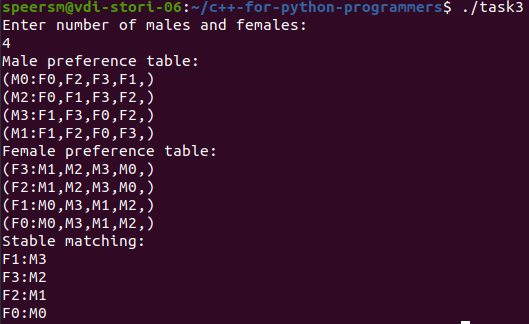

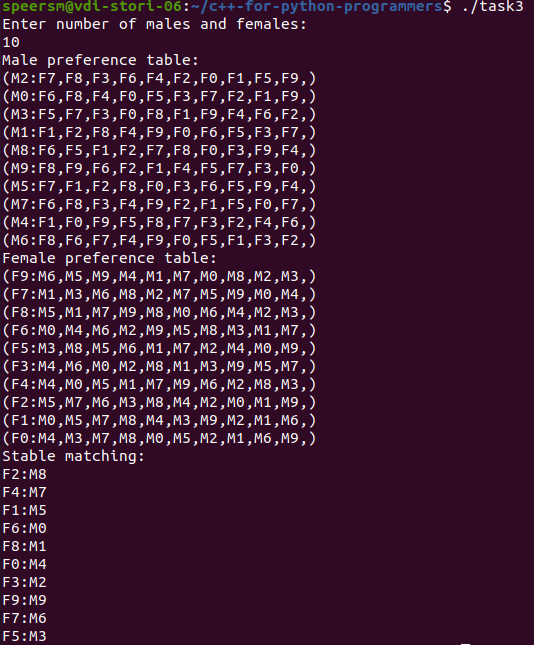